## MLE - Taxi Ride Durations

### Initialization 

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations and pandas tables in cells output
from IPython.core.display import display, HTML, Latex

## Setting style (not relevant in Colab)
display(HTML('<link rel="stylesheet" href="../../../css/style.css">'))  ## Use the same style as the rest of the site (mostly for titiles)
display(HTML("<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>"))  ## Center output figures

### Preparing the Dataset

Preparing the NYC taxi rides dataset.

#### Loading the data

- The data can be found at [https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv](https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv) 

In [ ]:
data_file = 'https://technion046195.github.io/semester_2019_spring/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

#### Previewing the data

printing out the 10 first rows.

In [ ]:
## Print the number of rows in the data set
number_of_rows = len(dataset)
display(Latex('Number of rows in the dataset: $N={}$'.format(number_of_rows)))

## Show the first 10 rows
display(HTML(dataset.head(10).to_html()))

<IPython.core.display.Latex object>

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


####  Plotting the data
Let us plot again the histogram of the durations

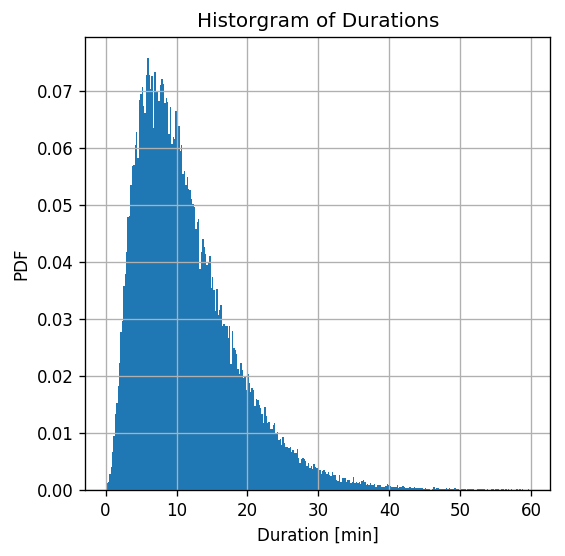

In [ ]:
## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True)
ax.set_title('Historgram of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]');

####  Splitting the dataset

We will split the data into 80% train set and 20% test set for later evaluations

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed (this is important to make our result reproducible)
rand_gen = np.random.RandomState(0)

## Generating a shuffled vector of indices
indices = rand_gen.permutation(n_samples)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

train_set = dataset.iloc[train_indices]
test_set = dataset.iloc[test_indices]

### Attempt 1 : Normal Distribution + MLE

Calculating models parameters:

$$
\mu=\displaystyle{\frac{1}{N}\sum_i x_i} \\
\sigma=\sqrt{\displaystyle{\frac{1}{N}\sum_i\left(x_i-\mu\right)^2}} \\
$$

In [ ]:
## extarcting the samples
x = train_set['duration'].values

## Normal distribution parameters
mu = np.sum(x) / len(x)
sigma = np.sqrt(np.sum((x - mu) ** 2) / len(x))

display(Latex('$\\mu = {:.01f}\\ \\text{{min}}$'.format(mu)))
display(Latex('$\\sigma = {:.01f}\\ \\text{{min}}$'.format(sigma)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

From here on we will use [np.mean](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.mean.html) and [np.std](http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.std.html) functions to calculate the mean and standard deviation.

In addition [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) has a wide range of distribution models. Each model comes with a set of methods for calculating the CDF, PDF, performing MLE fit, generate samples and more.

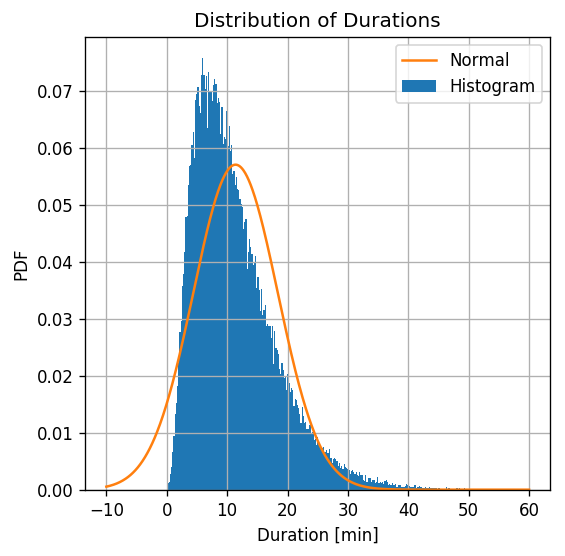

In [ ]:
## Define the grid
grid = np.arange(-10, 60 + 0.1, 0.1)

## Import the normal distribution model from SciPy
from scipy.stats import norm

## Define the normal distribution object
norm_dist = norm(mu, sigma)

## Calculate the normal distribution PDF over the grid
norm_pdf = norm_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();
fig.savefig('../media/normal.png')

### Attempt 2 : Rayleigh Distribution + MLE

Calculating models parameters:

$$
\Leftrightarrow \sigma = \sqrt{\frac{1}{2N}\sum_i x^2}
$$

<IPython.core.display.Latex object>

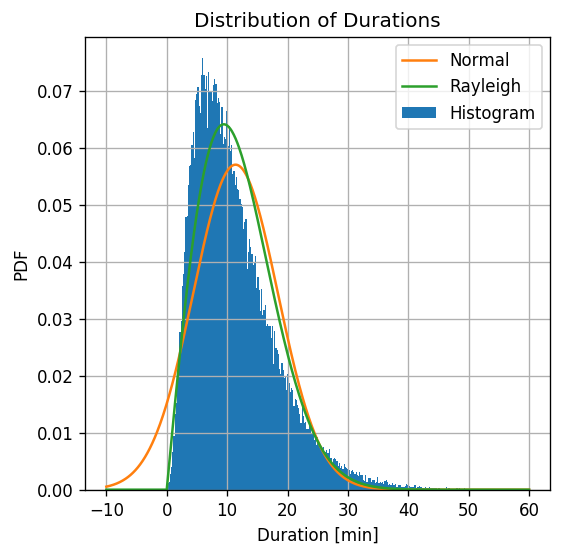

In [ ]:
## Import the normal distribution model from SciPy
from scipy.stats import rayleigh

## Find the model's parameters using SciPy
_, sigma = rayleigh.fit(x, floc=0)  ## equivalent to running: sigma = np.sqrt(np.sum(x ** 2) / len(x) / 2)

display(Latex('$\\sigma = {:.01f}$'.format(sigma)))

## Define the Rayleigh distribution object
rayleigh_dist = rayleigh(0, sigma)

## Calculate the Rayleigh distribution PDF over the grid
rayleigh_pdf = rayleigh_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.plot(grid, rayleigh_pdf, label='Rayleigh')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();
fig.savefig('../media/rayleigh.png')

### Attempt 2 : Generalized Gamma Distribution + MLE

Numerical solution

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

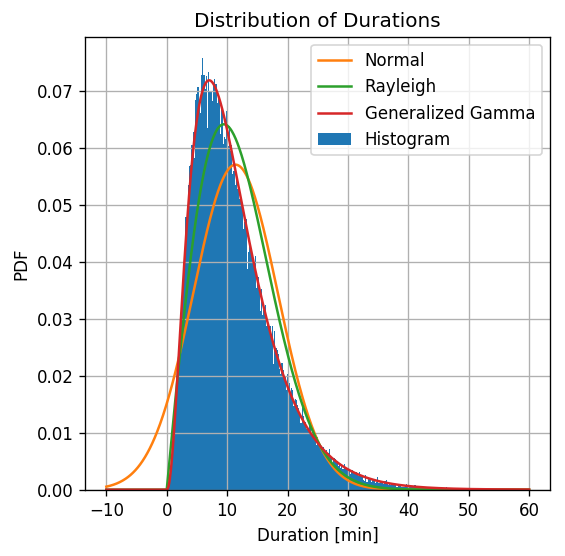

In [ ]:
## Import the normal distribution model from SciPy
from scipy.stats import gengamma

## Find the model's parameters using SciPy
a, c, _, sigma  = gengamma.fit(x, floc=0)

display(Latex('$a = {:.01f}$'.format(a)))
display(Latex('$c = {:.01f}$'.format(c)))
display(Latex('$\\sigma = {:.01f}$'.format(sigma)))

## Define the generalized gamma distribution object
gengamma_dist = gengamma(a, c, 0, sigma)

## Calculate the generalized gamma distribution PDF over the grid
gengamma_pdf = gengamma_dist.pdf(grid)

## Prepare the figure
fig, ax = plt.subplots()
ax.hist(dataset['duration'].values, bins=300 ,density=True, label='Histogram')
ax.plot(grid, norm_pdf, label='Normal')
ax.plot(grid, rayleigh_pdf, label='Rayleigh')
ax.plot(grid, gengamma_pdf, label='Generalized Gamma')
ax.set_title('Distribution of Durations')
ax.set_ylabel('PDF')
ax.set_xlabel('Duration [min]')
ax.legend();
fig.savefig('../media/generalized_gamma.png')